In [10]:
# Установка необходимых библиотек
# !pip install gymnasium[all]
# !pip install autorom[accept-rom-license]
# !pip install stable-baselines3
# !pip install PyVirtualDisplay
# !sudo apt-get install xvfb

In [11]:
import gymnasium as gym
from stable_baselines3 import DQN

In [12]:
env = gym.make('FrozenLake-v1',map_name="4x4", is_slippery=False)

In [13]:
# Описание задачи
observation_space = env.observation_space
action_space = env.action_space

In [14]:
# Инициализация модели DQN
model = DQN("MlpPolicy", env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [33]:
# Обучение модели
timestamp=1000000
model.learn(total_timesteps=timestamp, log_interval=100000)
model.save("dqn_cartpole")

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.29     |
|    ep_rew_mean      | 0.97     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 100000   |
|    fps              | 2693     |
|    time_elapsed     | 272      |
|    total_timesteps  | 735250   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.04e-08 |
|    n_updates        | 183812   |
----------------------------------


In [34]:
import gym
from IPython import display
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
from matplotlib import animation

In [35]:
import stable_baselines3
stable_baselines3.__version__

'2.2.1'

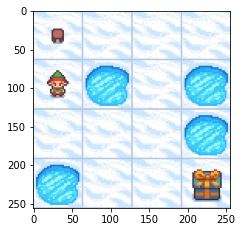

In [36]:
# Тестирование
d = Display()
d.start()

env = gym.make('FrozenLake-v1',map_name="4x4", is_slippery=False)

obs = env.reset()

img = []
for _ in range(100):
    action, _states = model.predict(obs)
    obs, reward, terminated, truncated = env.step(int(action))


    display.clear_output(wait=True)
    img.append(env.render('rgb_array'))

    if terminated:
        env.reset()
        break

dpi = 72
interval = 75 # ms

plt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)
display.display(display.HTML(ani.to_jshtml()))
